Data Mining in Financial Data

In [ ]:
#problem: The thing is that stock prices are usually a bit tougher to forecast due to market volatility and social influence on the trend of each stock.
#This is important because stock data can be used to forecast prices, thus earning profits for the parties concerned, i.e traders
#Stock price prediction is a huge problem which can be solved by using machine learning.

# Data Collection/Processing: 

In [27]:
!pip3 install yfinance

Defaulting to user installation because normal site-packages is not writeable
  Using cached yfinance-0.2.9-py2.py3-none-any.whl (55 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 4.1 MB/s eta 0:00:0000:0100:01
  Using cached multitasking-0.0.11-py3-none-any.whl (8.5 kB)
  Using cached pytz-2022.7.1-py2.py3-none-any.whl (499 kB)
  Using cached html5lib-1.1-py2.py3-none-any.whl (112 kB)
  Attempting uninstall: pytz
    Found existing installation: pytz 2022.4
    Uninstalling pytz-2022.4:
      Successfully uninstalled pytz-2022.4
  Attempting uninstall: html5lib
    Found existing installation: html5lib 0.9999999
    Uninstalling html5lib-0.9999999:
      Successfully uninstalled html5lib-0.9999999
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependenc

In [57]:
import pandas   as pd             # dataframe
import seaborn  as sns            # plots
import matplotlib.pyplot as plt   # plots

try:
    import yfinance as yf         # import Yahoo! Finance
except:
    ! pip install yfinance
    import yfinance as yf         # import Yahoo! Finance


In [59]:
#  SET ticker, yf_period and yf_interval
#  ticker - securities to download
ticker      = ["amzn", "FBgrx", "qqq", "VBTLX", 'twtr', 'FLT', '^dji']

#  set market indexes to compare equities with
market_index = ['^DJI', '^IXIC', '^GSPC']  # Dow Jones, Nasdaq and S&P500

#  time period and interval
yf_period   = "20y"   # 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
yf_interval = "1d"    # 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo



#  print set parameters
print('TICKER:\t\t{}'.format(ticker))
print('MARKET INDEX:\t{}'.format(market_index))
print('PERIOD:\t\t{}'.format(yf_period))
print('INTERVAL:\t{}'.format(yf_interval))

TICKER:		['amzn', 'FBgrx', 'qqq', 'VBTLX', 'twtr', 'FLT', '^dji']
MARKET INDEX:	['^DJI', '^IXIC', '^GSPC']
PERIOD:		20y
INTERVAL:	1d


# Data Exploration: Exploring the Dataset

**Plot the daily, weekly and monthly returns of a set of stocks of your choice** 
* references:
    * https://www.investopedia.com/terms/y/yearly-rate-of-return-method.asp
    * https://www.fool.com/knowledge-center/how-to-calculate-a-monthly-return-on-investment/#:~:text=Take%20the%20ending%20balance%2C%20and,corresponds%20to%20your%20monthly%20return.
    * https://www.investopedia.com/terms/i/intraday-return.asp#:~:text=How%20Is%20Daily%20Return%20Calculated,price%2C%20then%20multiply%20by%20100. 


In [68]:
#  1.  uppercase and sort ticker
ticker = [x.upper() for x in ticker]
ticker.sort()


#  2.  set market indexes
market_index = ['^DJI', '^IXIC', '^GSPC']  # Dow Jones, Nasdaq and S&P500


#  3.  remove markets from ticker for plots, returns
for market in market_index:
    if market in ticker:
        ticker.remove(market)


#  4.  symbols = market_indexes + ticker
symbols = []   # initialize list
symbols = ticker + market_index


#  print set parameters
print('\nSYMBOLS (ticker + market index):\n{}'.format(symbols))

#  1.  Create dataframe yf_price with yf.download
yf_returns = yf.download(
        tickers = symbols,       # tickers list or string as well
        period = yf_period,      # optional, default is '1mo'
        interval = yf_interval,  # fetch data by intervaal
        group_by = 'ticker',     # group by ticker
        auto_adjust = True,      # adjust all OHLC (open-high-low-close)
        prepost = True,          # download market hours data
        threads = True,          # threads for mass downloading
        proxy = None)            # proxy


#  2.  Select 'Close' (price at market close) column only
yf_returns = yf_returns.iloc[:, yf_returns.columns.get_level_values(1)=='Close']


#  3.  Remove the dataframe multi-index
yf_returns.columns = yf_returns.columns.droplevel(1)  # multi-index


yf_returns.tail(10)

#  create YEAR, MONTH, WEEK columns in perf_dy
perf_dy = yf_returns
perf_dy['MONTH'] = perf_dy.index.strftime("%Y-%m")  # YEAR-MONTH
perf_dy['WEEK']  = perf_dy.index.strftime("%Y-%U")  # YEAR-WEEK


#  create time dataframes using GROUPBY
perf_mh = perf_dy.groupby('MONTH').sum()
perf_wk = perf_dy.groupby('WEEK').sum()


#  print index and column names
print("\nperf_dy:\n", perf_dy.index.name, perf_dy.columns.values)
print("\nperf_mh:\n", perf_mh.index.name, perf_mh.columns.values)
print("\nperf_wk:\n", perf_wk.index.name, perf_wk.columns.values)


SYMBOLS (ticker + market index):
['AMZN', 'FBGRX', 'FLT', 'QQQ', 'TWTR', 'VBTLX', '^DJI', '^IXIC', '^GSPC']
[*********************100%***********************]  9 of 9 completed

perf_dy:
 Date ['TWTR' 'FLT' '^GSPC' 'AMZN' 'QQQ' 'VBTLX' '^DJI' 'FBGRX' '^IXIC' 'MONTH'
 'WEEK']

perf_mh:
 MONTH ['TWTR' 'FLT' '^GSPC' 'AMZN' 'QQQ' 'VBTLX' '^DJI' 'FBGRX' '^IXIC']

perf_wk:
 WEEK ['TWTR' 'FLT' '^GSPC' 'AMZN' 'QQQ' 'VBTLX' '^DJI' 'FBGRX' '^IXIC']


/var/folders/_j/y08j3nns20g6lq25fhcc38w40000gn/T/ipykernel_11580/3437457697.py:53: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  perf_mh = perf_dy.groupby('MONTH').sum()
/var/folders/_j/y08j3nns20g6lq25fhcc38w40000gn/T/ipykernel_11580/3437457697.py:54: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  perf_wk = perf_dy.groupby('WEEK').sum()


In [70]:
#  create function to plot market and indexes
def plotPerformance(arg):
    df = arg
    
    plt.figure(figsize=(10,8))

    #  subplot #1
    plt.subplot(221)
    df[market_index].boxplot()
    plt.title('market indexes')
    plt.ylabel('percent change')
    plt.xticks(rotation = 90)
    plt.grid(False)

    #  subplot #2
    plt.subplot(222)
    plt.plot(df[market_index])
    plt.title('market indexes')
    plt.legend(df[market_index], loc="upper left", bbox_to_anchor=(1,1))
    plt.xticks(rotation = 90)
    
    plt.show()  # plot subplots
    
    #  plot #3
    plt.figure(figsize=(10,6))
    df[ticker].boxplot()
    plt.title('SYMBOLS', fontsize = 14)
    plt.ylabel('percent change', fontsize = 14)
    plt.xticks(rotation = 90)
    plt.grid(False)
    plt.show()
    
    #  plot #4
    plt.figure(figsize=(10,6))
    plt.plot(df[ticker])
    plt.title('SYMBOLS', fontsize = 14)
    plt.ylabel('percent change', fontsize = 14)
    plt.legend(df[ticker], loc="upper left", bbox_to_anchor=(1,1))
    plt.xticks(rotation = 90)
    plt.show()
    

    #  print returns
    print('\nRETURNS FROM {} TO {}:'.format(df.index[0], df.index[-1]))
    for i in market_index + ticker:
        print('{:>10}{:>10.2f}%'.format(i,df[i].sum()))

    return

print('function plotPerformance created')

function plotPerformance created


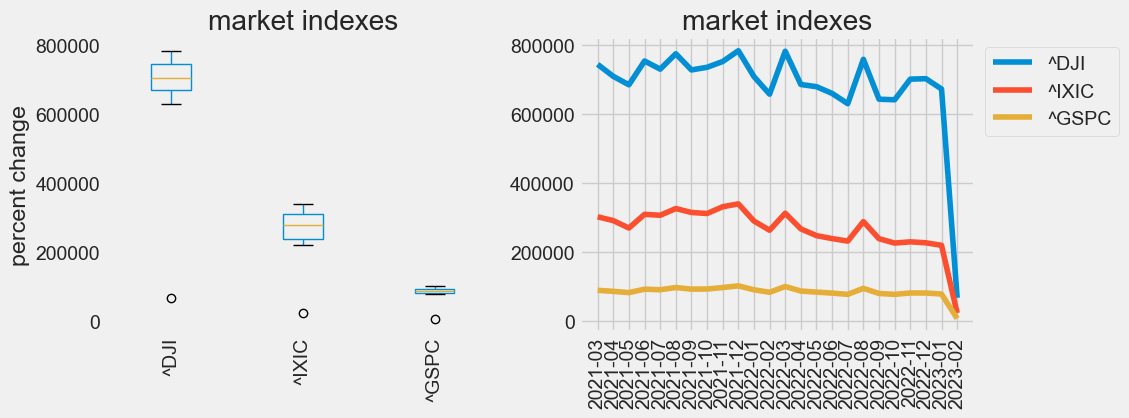

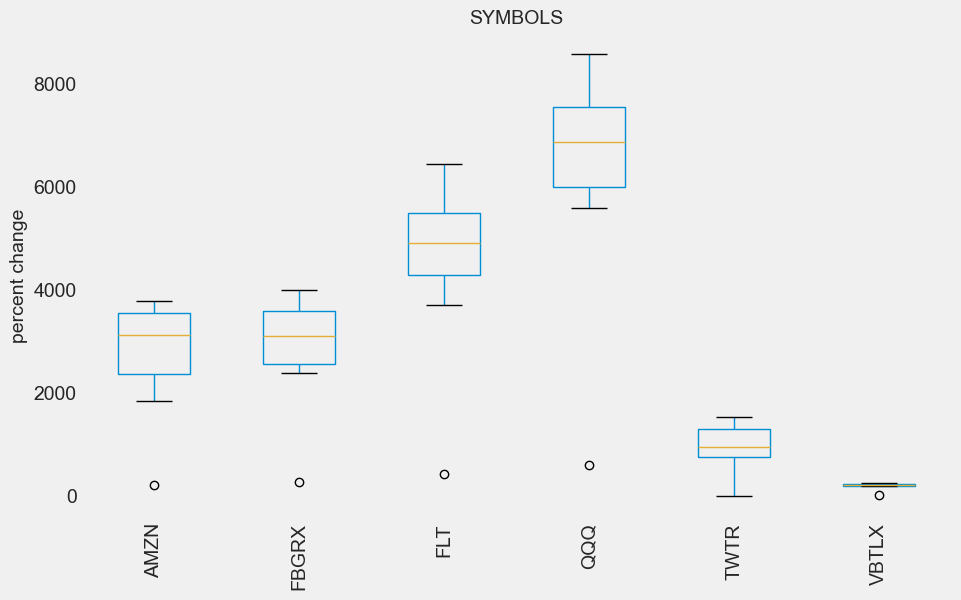

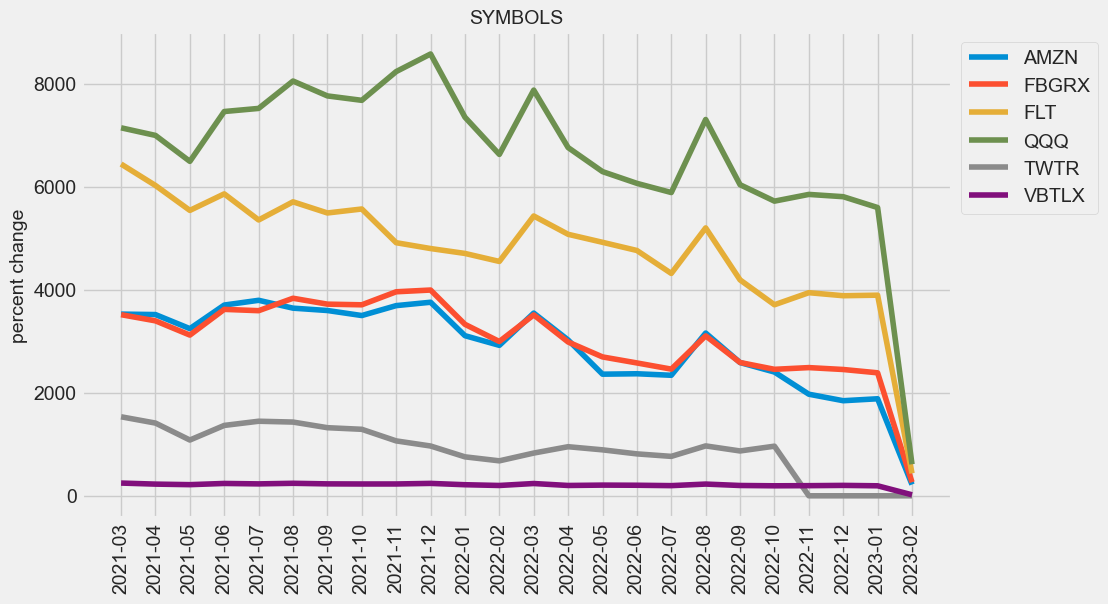


RETURNS FROM 2021-03 TO 2023-02:
      ^DJI16400433.56%
     ^IXIC6424468.19%
     ^GSPC2047266.05%
      AMZN  69745.34%
     FBGRX  72788.72%
       FLT 114769.27%
       QQQ 159774.63%
      TWTR  21418.37%
     VBTLX   5035.25%


In [73]:
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary
plotPerformance(perf_mh.tail(24))  # past 24 months (monthly)


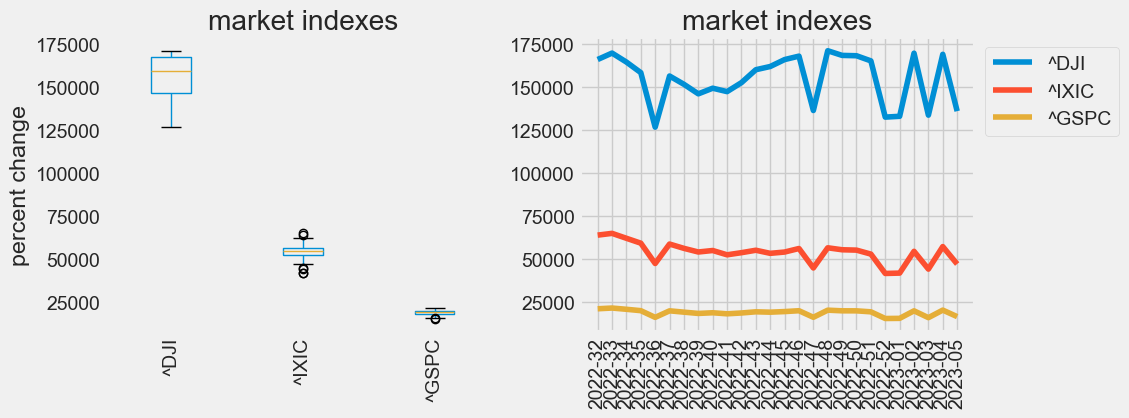

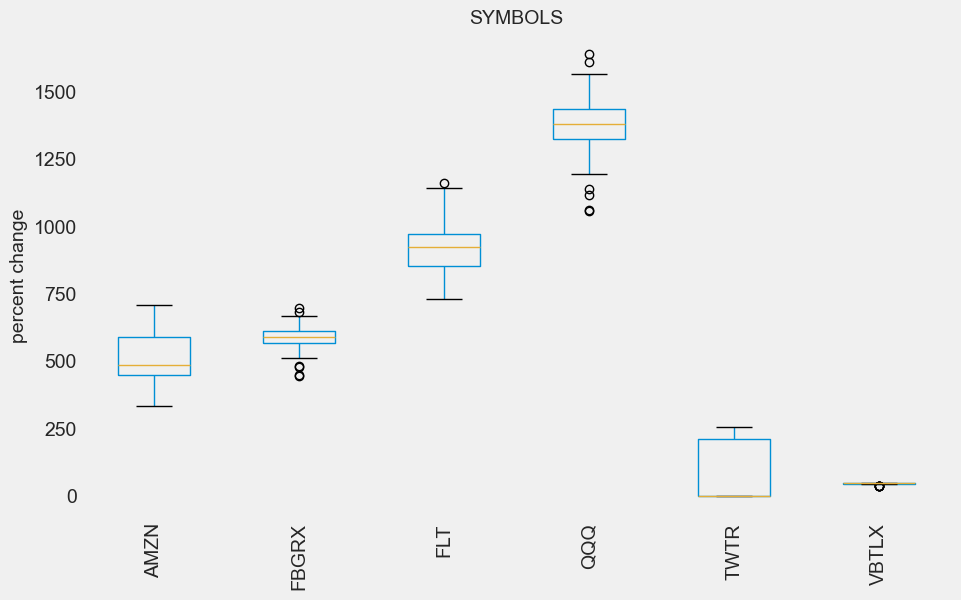

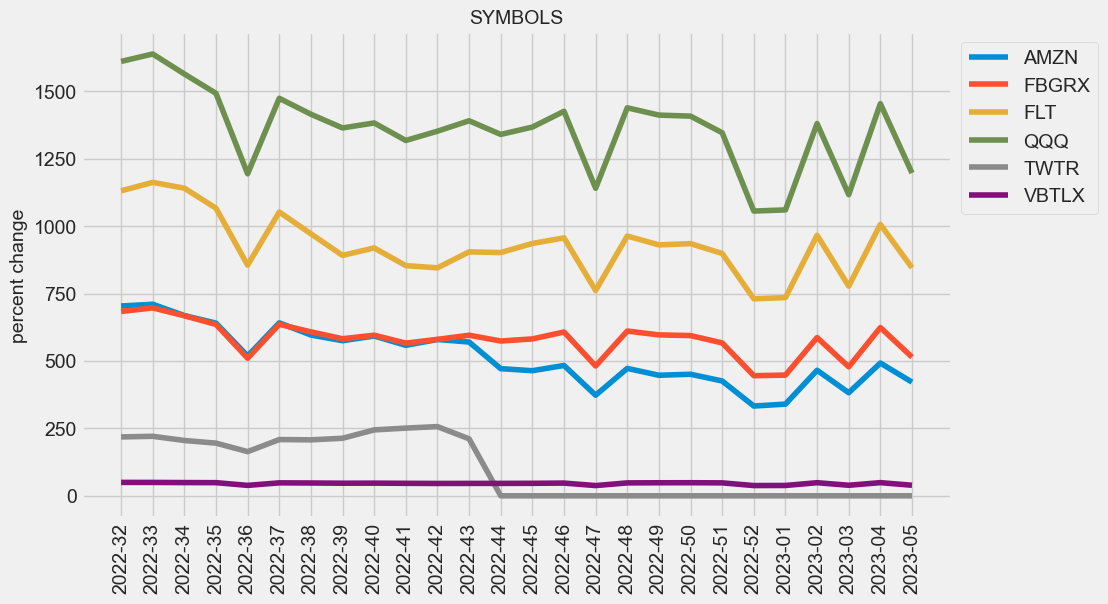


RETURNS FROM 2022-32 TO 2023-05:
      ^DJI4027479.18%
     ^IXIC1395005.46%
     ^GSPC 486032.19%
      AMZN  13381.95%
     FBGRX  15073.22%
       FLT  24147.95%
       QQQ  35353.82%
      TWTR   2596.83%
     VBTLX   1184.93%


In [74]:
plotPerformance(perf_wk.tail(26))  # past 26 weeks (weekly)


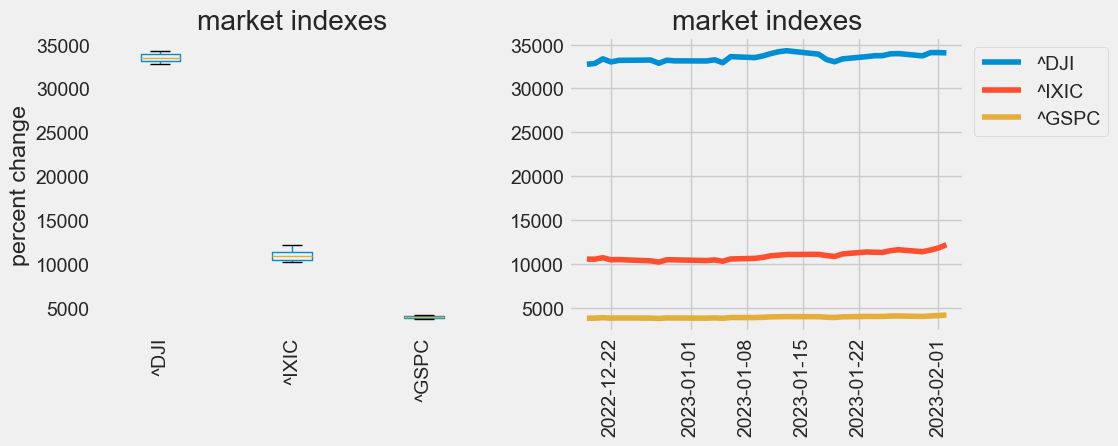

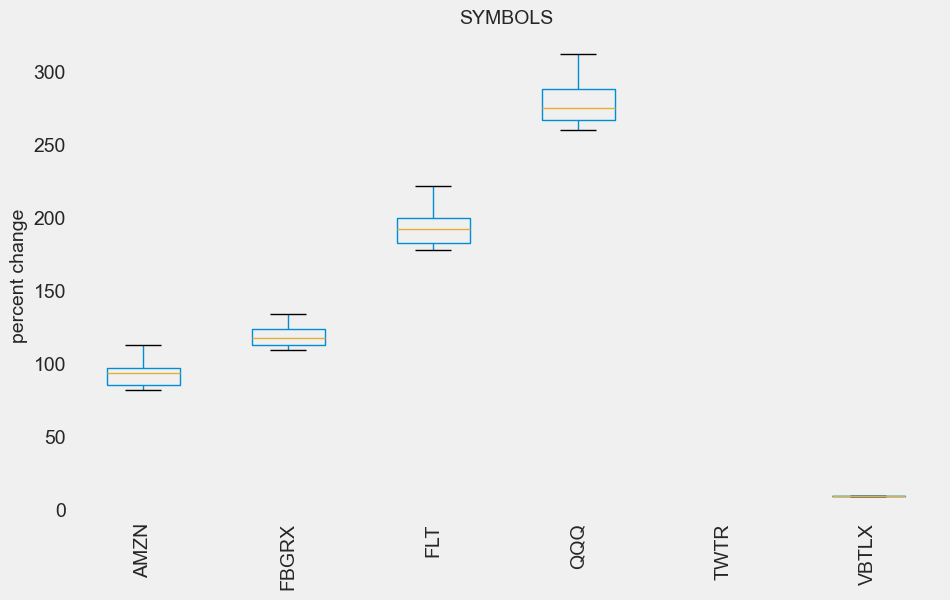

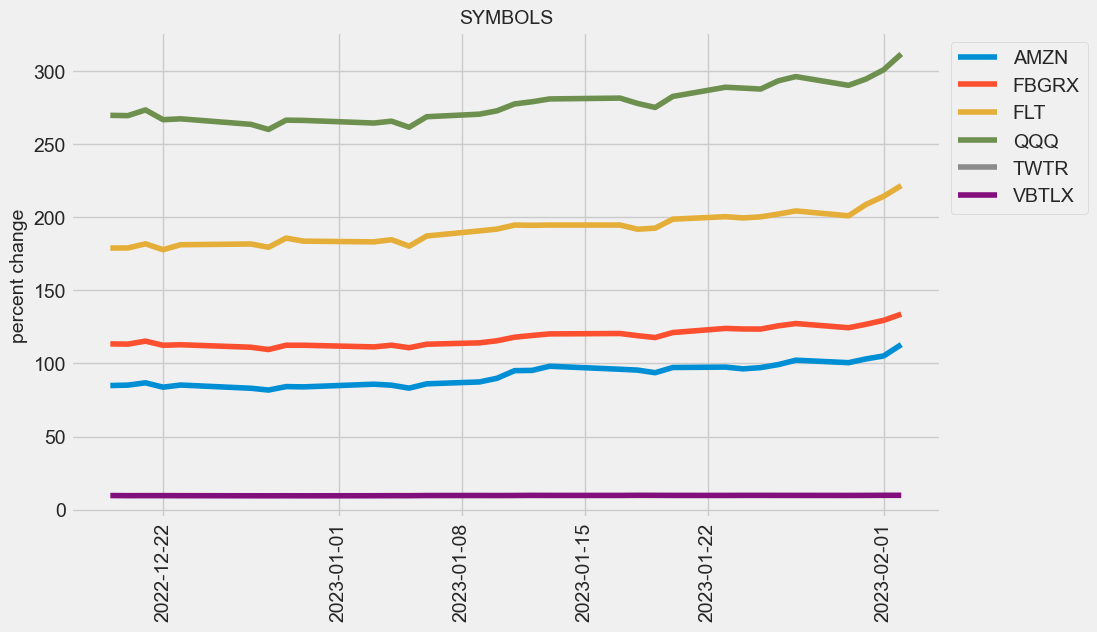


RETURNS FROM 2022-12-19 00:00:00-05:00 TO 2023-02-02 00:00:00-05:00:
      ^DJI1038967.40%
     ^IXIC 338584.54%
     ^GSPC 121998.28%
      AMZN   2861.49%
     FBGRX   3664.65%
       FLT   5961.99%
       QQQ   8614.24%
      TWTR      0.00%
     VBTLX    299.82%


In [75]:
plotPerformance(perf_dy.tail(31))  # past 31 days (daily)


yf_returns = round(yf_returns.pct_change()*100, 2)


yf_returns.tail(10)


In [79]:
#Any more analysis (Dividend percentages)
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary

yf_divdend = pd.DataFrame()   # initialize dataframe

for i in ticker:
    if i != market_index:
        x = pd.DataFrame(yf.Ticker(i).dividends)
        x = x.rename(columns={"Dividends":i})
        yf_divdend = pd.concat([yf_divdend,x], axis=1)
        if len(x) > 0:
            print('{:>8}\t- dividends'.format(i))
        else:
            print('{:>8}\t- no dividends'.format(i))             


#  match dates in yf_returns (first return data to now)
yf_divdend = yf_divdend[yf_divdend.index >= yf_returns.index[0]]


#  print out dividends
print("\n",yf_divdend.tail(10))



    AMZN	- no dividends
   FBGRX	- dividends
     FLT	- no dividends
     QQQ	- dividends
    TWTR	- no dividends
   VBTLX	- dividends

                            AMZN  FBGRX  FLT    QQQ  TWTR  VBTLX
Date                                                           
2022-05-31 00:00:00-04:00   NaN    NaN  NaN    NaN   NaN  0.019
2022-06-21 00:00:00-04:00   NaN    NaN  NaN  0.527   NaN    NaN
2022-06-30 00:00:00-04:00   NaN    NaN  NaN    NaN   NaN  0.019
2022-07-29 00:00:00-04:00   NaN    NaN  NaN    NaN   NaN  0.020
2022-08-31 00:00:00-04:00   NaN    NaN  NaN    NaN   NaN  0.021
2022-09-19 00:00:00-04:00   NaN    NaN  NaN  0.519   NaN    NaN
2022-09-30 00:00:00-04:00   NaN    NaN  NaN    NaN   NaN  0.020
2022-10-31 00:00:00-04:00   NaN    NaN  NaN    NaN   NaN  0.021
2022-11-30 00:00:00-05:00   NaN    NaN  NaN    NaN   NaN  0.022
2022-12-19 00:00:00-05:00   NaN    NaN  NaN  0.655   NaN    NaN


# The Solution: implement a data science solution to the problem you are trying to solve.

**Briefly describe the idea of your solutions to the problem in the following cell (you should use at least 2 methods/models to solve the problem, and compare the performance. You are free to use any machine learning model or statistical model like ARIMA.):**

In [81]:
#The solution: We implement two models and compare their performance for stock price prediction
#Obviously, the two methods demonstrate very different performance. 
#What I do in the next step is just blending predictions of 2 models by creating an optimization problem
#where target function is RMSE between forecast and historical data for last month

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Open        High         Low       Close  \
Date                                                                        
2023-01-20 00:00:00-05:00   93.860001   97.349998   93.199997   97.250000   
2023-01-23 00:00:00-05:00   97.559998   97.779999   95.860001   97.519997   
2023-01-24 00:00:00-05:00   96.930000   98.089996   96.000000   96.320000   
2023-01-25 00:00:00-05:00   92.559998   97.239998   91.519997   97.180000   
2023-01-26 00:00:00-05:00   98.239998   99.489998   96.919998   99.220001   
2023-01-27 00:00:00-05:00   99.529999  103.489998   99.529999  102.239998   
2023-01-30 00:00:00-05:00  101.089996  101.739998   99.010002  100.550003   
2023-01-31 00:00:00-05:00  101.160004  103.349998  101.139999  103.129997   
2023-02-01 00:00:00-05:00  102.529999  106.239998  101.239998  105.150002   
2023-02-02 00:00:00-05:00  110.250000  114.000000  108.879997  112.910004   

                            Adj Close     Volume company_name  
Date                                                           
2023-01-20 00:00:00-05:00   97.250000   67307100       AMAZON  
2023-01-23 00:00:00-05:00   97.519997   76501100       AMAZON  
2023-01-24 00:00:00-05:00   96.320000   66929500       AMAZON  
2023-01-25 00:00:00-05:00   97.180000   94261600       AMAZON  
2023-01-26 00:00:00-05:00   99.220001   68523600       AMAZON  
2023-01-27 00:00:00-05:00  102.239998   87678100       AMAZON  
2023-01-30 00:00:00-05:00  100.550003   70691900       AMAZON  
2023-01-31 00:00:00-05:00  103.129997   66527300       AMAZON  
2023-02-01 00:00:00-05:00  105.150002   80450100       AMAZON  
2023-02-02 00:00:00-05:00  112.910004  156164800       AMAZON

**Write codes to implement the solution in python:**

In [97]:
!pip3 install iplot
!pip3 install plotly

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.2/15.2 MB 7.3 MB/s eta 0:00:0000:0100:01


In [98]:
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary

import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
import iplot
import plotly.graph_objs as go
import yfinance as yf
import statsmodels.api as sm
from datetime import timedelta
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import coint
import warnings


warnings.filterwarnings("ignore")
plt.style.use('seaborn')

# Results: summarize and visualize the results discovered from the analysis

**Summarize the results of different models. Compare the perfomance and explain it. Please use figures or tables to present the results.**


In [100]:
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary

data = []
asset_ticker = ['GC=F', '^W5000', 'AMT', '^GSPC', '^RUT', '^N225', '^IXIC', 'DJI']
asset_names = ['Gold', 'Wilshire 5000', 'American Tower Corporation', 'S&P 500', 'Russel 2000', 
                  'Nikkei 225', 'Nasdaq Composite', 'Dow_Jones Industrial Average']
for ticker in asset_ticker:
    msft = yf.Ticker(ticker)
    df = msft.history(start='2001-01-01',end='2020-12-30')['Open']
    data.append(df)
    
price = pd.concat([df for df in data],axis=1)
price.columns = asset_names # we will use actual names, instead of symbols for column names

price.head(3)

Gold  Wilshire 5000  \
Date                                                   
2001-01-02 05:00:00+00:00  268.399994   11763.919922   
2001-01-03 05:00:00+00:00  268.000000   12380.259766   
2001-01-03 15:00:00+00:00         NaN            NaN   

                           American Tower Corporation      S&P 500  \
Date                                                                 
2001-01-02 05:00:00+00:00                   30.646254  1320.280029   
2001-01-03 05:00:00+00:00                   29.230247  1283.270020   
2001-01-03 15:00:00+00:00                         NaN          NaN   

                           Russel 2000    Nikkei 225  Nasdaq Composite  \
Date                                                                     
2001-01-02 05:00:00+00:00   483.549988           NaN       2474.159912   
2001-01-03 05:00:00+00:00   462.489990           NaN       2254.560059   
2001-01-03 15:00:00+00:00          NaN  13898.089844               NaN   

                           Dow_Jones Industrial Average  
Date                                                     
2001-01-02 05:00:00+00:00                  10646.200195  
2001-01-03 05:00:00+00:00                  10945.799805  
2001-01-03 15:00:00+00:00                           NaN

In [107]:
weekly_price = price.asfreq('W', method='ffill')
weekly_rates = ((weekly_price - weekly_price.shift(1))/weekly_price.shift(1)).iloc[1::,:]

<AxesSubplot: >

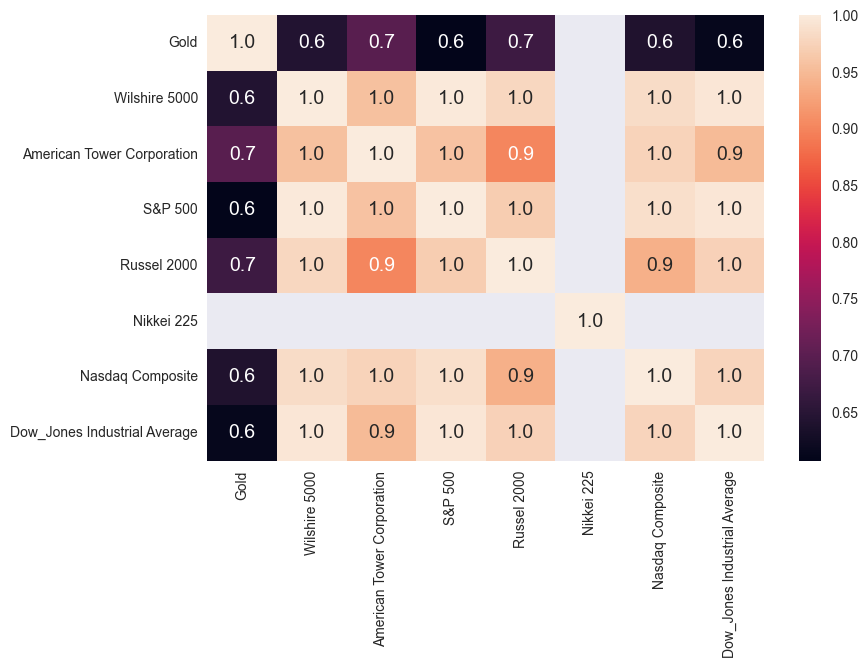

In [108]:
sns.heatmap(weekly_price.corr(), annot=True,linecolor="red",fmt= '.1f')

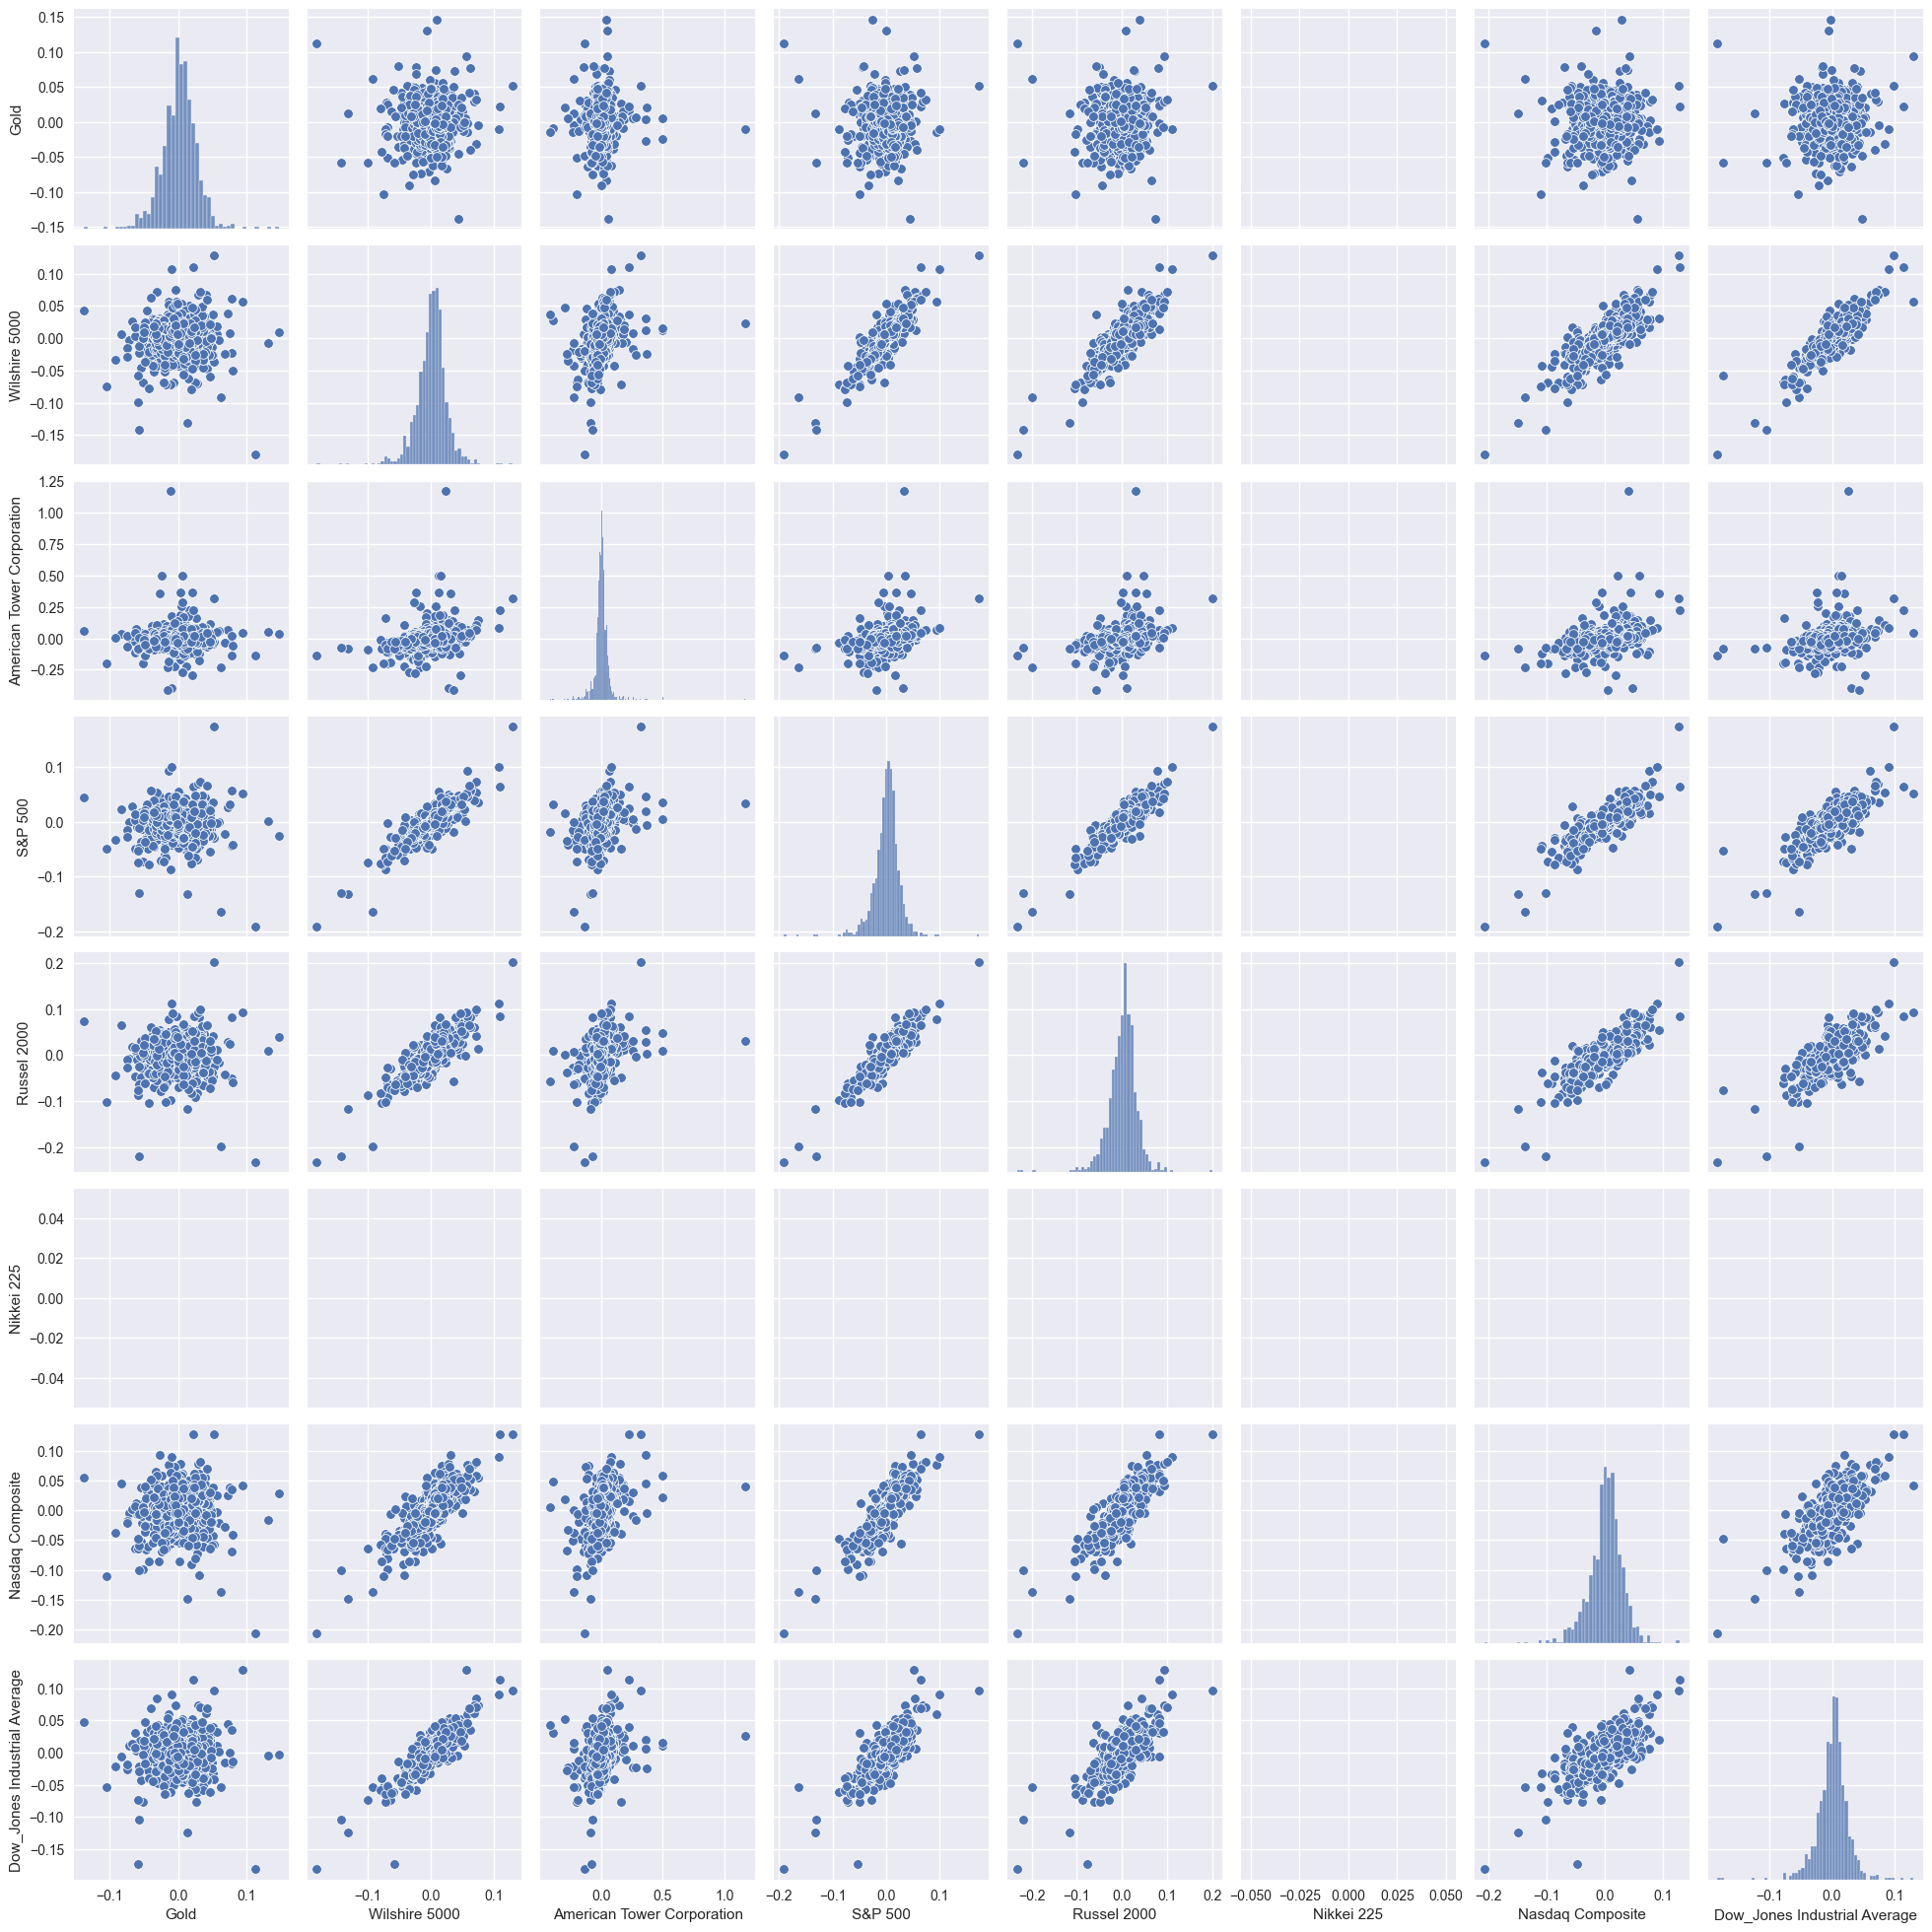

In [109]:
sns.pairplot(weekly_rates)

array([[<AxesSubplot: xlabel='Date'>, <AxesSubplot: xlabel='Date'>],
       [<AxesSubplot: xlabel='Date'>, <AxesSubplot: xlabel='Date'>],
       [<AxesSubplot: xlabel='Date'>, <AxesSubplot: xlabel='Date'>],
       [<AxesSubplot: xlabel='Date'>, <AxesSubplot: xlabel='Date'>]],
      dtype=object)

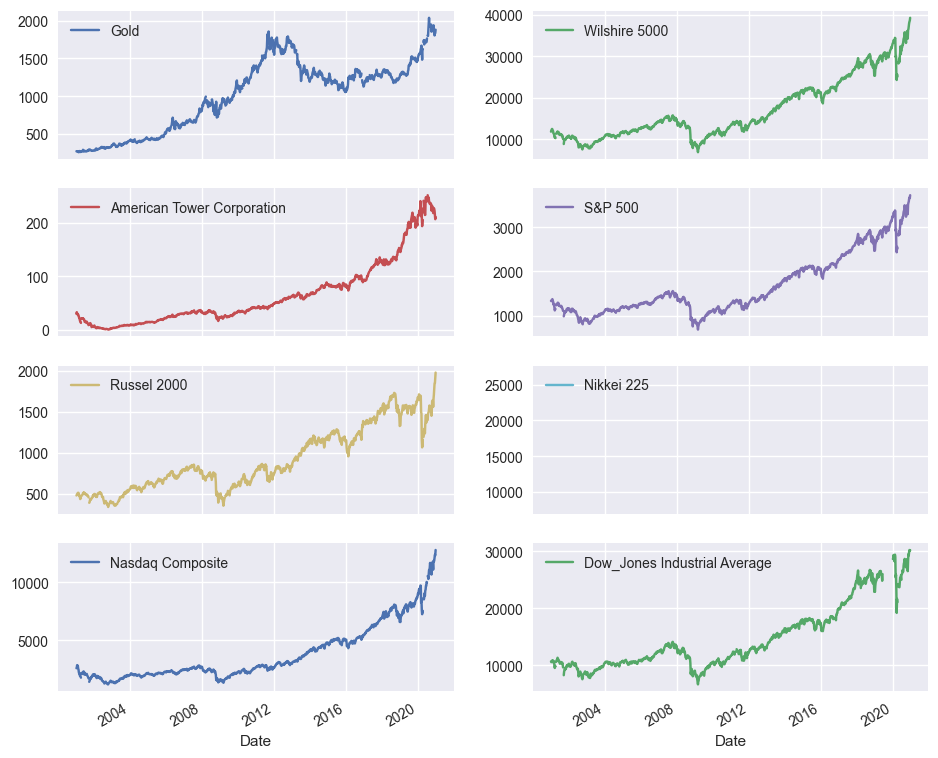

In [112]:
weekly_price.plot(subplots=True, layout=(4,2),figsize=(10,10))


array([[<AxesSubplot: xlabel='Date'>, <AxesSubplot: xlabel='Date'>],
       [<AxesSubplot: xlabel='Date'>, <AxesSubplot: xlabel='Date'>],
       [<AxesSubplot: xlabel='Date'>, <AxesSubplot: xlabel='Date'>],
       [<AxesSubplot: xlabel='Date'>, <AxesSubplot: xlabel='Date'>]],
      dtype=object)

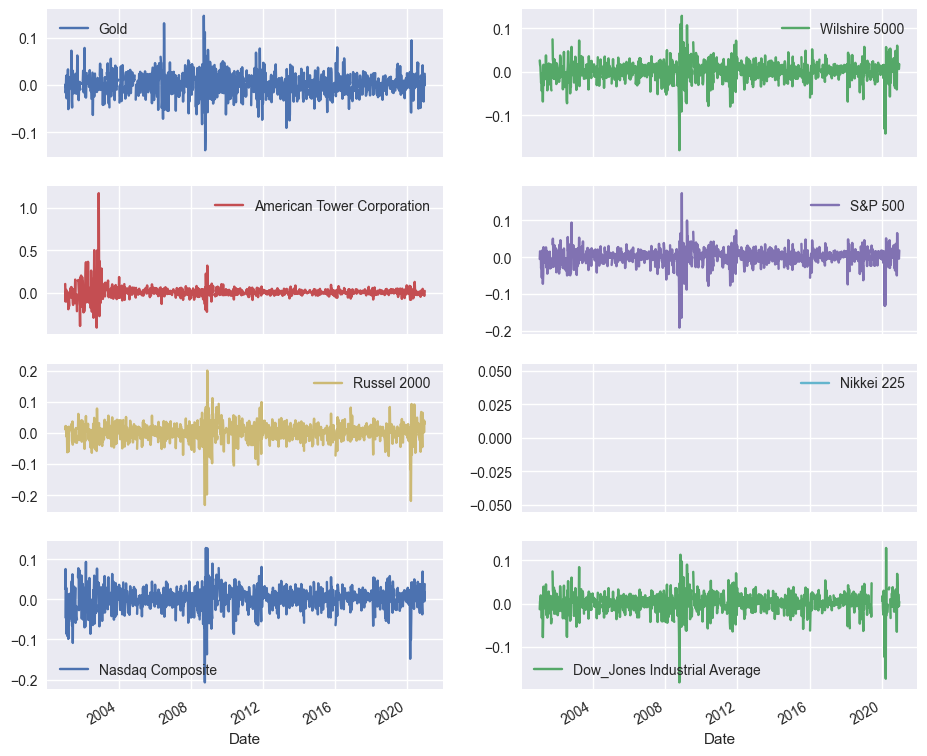

In [113]:
weekly_rates.plot(subplots=True, layout=(4,2), figsize=(10,10))

In [130]:
!pip3 install pmdarima --quiet


In [132]:
!pip3 install statsmodels==0.11.0rc1 --quiet
!pip3 install -Iv pulp==1.6.8 --quiet

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pmdarima 2.0.2 requires statsmodels>=0.13.2, but you have statsmodels 0.11.0rc1 which is incompatible.
Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 3.1 MB/s eta 0:00:0000:0100:01m
  Preparing metadata (setup.py) ... done
  Using cached pyparsing-3.0.9-py3-none-any.whl (98 kB)
  Created wheel for pulp: filename=PuLP-1.6.8-py3-none-any.whl size=12269581 sha256=78fc9cc844c6850e86910848d86c8d206df049f9ee514ecfbeff48a2345c6b1b
  Stored in directory: /Users/aninda/Library/Caches/pip/wheels/40/9f/f7/f85fa12472b711dbd9f9aebe9b47b02effe7786b0da2674a8d
Successfully built pulp
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [133]:
stock_name = 'AMD'  # here you can change the name of stock ticker, for example we will take AMD ticker
data = yf.download(stock_name, start="2020-03-26", end="2021-03-29")

[*********************100%***********************]  1 of 1 completed


In [135]:
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pmdarima as pm
plt.style.use('fivethirtyeight')
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import ADFTest
from pmdarima.datasets import load_wineind
import random

def arima(stock_name, data):
    df_close = data['Close']
    
    # Split data into train and test set (90% - train, 10% - test)
    df_log = df_close
    #train_data, test_data = df_log[3:int(len(df_log) * 0.9)], df_log[int(len(df_log) * 0.9):]
    train_data, test_data = df_log[3:int(len(df_log) * 0.9)], df_log[int(len(df_log) * 0.9):]
    test_values = len(df_log) * 0.01 + 1.0
    x_train = list(range(0, 224))
    x_test = list(range(224, int(len(data))))
    
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=x_train, y=train_data, mode='lines+markers', marker=dict(size=4),  name='train', marker_color='#39304A'))
    fig.add_trace(go.Scatter(x=x_test, y=test_data, mode='lines+markers', marker=dict(size=4), name='test', marker_color='#A98D75'))
    fig.update_layout(legend_orientation="h",
                  legend=dict(x=.5, xanchor="center"),
                  plot_bgcolor='#FFFFFF',  
                  xaxis=dict(gridcolor = 'lightgrey'),
                  yaxis=dict(gridcolor = 'lightgrey'),
                  title_text = f'{stock_name} ARIMA data', title_x = 0.5,
                  xaxis_title="Timestep",
                  yaxis_title="Stock price",
                  margin=dict(l=0, r=0, t=30, b=0))
    fig.show()
    
    model =  pm.auto_arima(df_log,start_p=0, d=None, start_q=0, 
                          max_p=5, max_d=5, max_q=5, start_P=0, 
                          D=1, start_Q=0, max_P=5, max_D=5,
                          max_Q=5, m=7, seasonal=True, 
                          error_action='warn',trace = True,
                          supress_warnings=True,stepwise = True,
                          random_state=20,n_fits = 50 )

    model.summary()

    exo_data = data['Volume']
    exo_data = exo_data[int(len(exo_data) * 0.9):]
    
    preds = model.predict(n_periods = 22, X = exo_data)

    preds = np.vstack(preds)
    hist_data = yf.download(stock_name, start="2021-04-01", end="2021-05-04")
    hist_data = hist_data.drop(['Open', 'High', 'Low', 'Adj Close', 'Volume'], axis=1)
    hist_data = hist_data['Close']
    hist_data = np.array(hist_data)
    
    rmse = np.sqrt(np.mean(((preds - hist_data) ** 2)))
    print(f'RMSE ARIMA: {rmse}')
    
    # build graphs
    preds_gr = np.reshape(preds, (22,))
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=list(range(0, 21)), y=hist_data, mode='lines+markers',  name='historical', marker_color='#39304A'))
    fig.add_trace(go.Scatter(x=list(range(0, 21)), y=preds_gr, mode='lines+markers', name='predictions', marker_color='#FFAA00'))
    fig.update_layout(legend_orientation="h",
                  legend=dict(x=.5, xanchor="center"),
                  plot_bgcolor='#FFFFFF',  
                  xaxis=dict(gridcolor = 'lightgrey'),
                  yaxis=dict(gridcolor = 'lightgrey'),
                  title_text = f'{stock_name} ARIMA prediction', title_x = 0.5,
                  xaxis_title="Timestep",
                  yaxis_title="Stock price",
                  margin=dict(l=0, r=0, t=30, b=0))
    fig.show()

    return preds, rmse

In [136]:
arima_pred, arima_rmse = arima(stock_name, data)
print(arima_pred.shape)

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,1,0)[7] intercept   : AIC=1554.747, Time=0.01 sec
 ARIMA(1,0,0)(1,1,0)[7] intercept   : AIC=1212.598, Time=0.48 sec
 ARIMA(0,0,1)(0,1,1)[7] intercept   : AIC=1400.799, Time=0.06 sec
 ARIMA(0,0,0)(0,1,0)[7]             : AIC=1559.251, Time=0.01 sec
 ARIMA(1,0,0)(0,1,0)[7] intercept   : AIC=1262.089, Time=0.02 sec
 ARIMA(1,0,0)(2,1,0)[7] intercept   : AIC=1192.848, Time=0.17 sec
 ARIMA(1,0,0)(3,1,0)[7] intercept   : AIC=1184.962, Time=0.51 sec
 ARIMA(1,0,0)(4,1,0)[7] intercept   : AIC=1178.594, Time=0.95 sec
 ARIMA(1,0,0)(5,1,0)[7] intercept   : AIC=1172.640, Time=1.60 sec
 ARIMA(1,0,0)(5,1,1)[7] intercept   : AIC=inf, Time=3.76 sec
 ARIMA(1,0,0)(4,1,1)[7] intercept   : AIC=inf, Time=2.50 sec
 ARIMA(0,0,0)(5,1,0)[7] intercept   : AIC=1552.934, Time=1.13 sec
 ARIMA(2,0,0)(5,1,0)[7] intercept   : AIC=1172.822, Time=1.86 sec
 ARIMA(1,0,1)(5,1,0)[7] intercept   : AIC=1173.046, Time=1.84 sec
 ARIMA(0,0,1)(5,1,0)[7] intercept   : AIC=1

(22, 1)


In [137]:
#SARIMAX 
from statsmodels.tsa.statespace.sarimax import SARIMAX
data3 = data['Close']
    
# Split data into train and test set (90% - train, 10% - test)
train3_data, test3_data = data3[3:int(len(data3) * 0.9)], data3[int(len(data3) * 0.9):]
#test_values = len(data3) * 0.01 + 1.0
x_train = list(range(0, 224))
x_test = list(range(224, int(len(data3))))

exo_data = data['Volume']
exo_data = exo_data[int(len(exo_data) * 0.9):]

fig = go.Figure()
fig.add_trace(go.Scatter(x=x_train, y=train3_data, mode='lines+markers', marker=dict(size=4),  name='train', marker_color='#39304A'))
fig.add_trace(go.Scatter(x=x_test, y=test3_data, mode='lines+markers', marker=dict(size=4), name='test', marker_color='#A98D75'))
fig.update_layout(legend_orientation="h",
                  legend=dict(x=.5, xanchor="center"),
                  plot_bgcolor='#FFFFFF',  
                  xaxis=dict(gridcolor = 'lightgrey'),
                  yaxis=dict(gridcolor = 'lightgrey'),
                  title_text = f'{stock_name} SARIMAX data', title_x = 0.5,
                  xaxis_title="Timestep",
                  yaxis_title="Stock price",
                  margin=dict(l=0, r=0, t=30, b=0))
fig.show()
    
model = SARIMAX(train3_data, order=(3, 1, 2))

arima_model = model.fit(X = exo_data, disp=-1)

print(arima_model.summary())


preds3 = arima_model.predict(n_periods=22, alpha=0.05)

preds3 = np.vstack(preds3)
preds3 = preds3[-22:]
hist_data = yf.download(stock_name, start="2021-04-01", end="2021-05-04")
hist_data = hist_data.drop(['Open', 'High', 'Low', 'Adj Close', 'Volume'], axis=1)
hist_data = hist_data['Close']
hist_data = np.array(hist_data)
    
rmse = np.sqrt(np.mean(((preds3 - hist_data) ** 2)))
print(f'RMSE SARIMAX: {rmse}')
    
preds_gr = np.reshape(preds3, (22,))
fig = go.Figure()
fig.add_trace(go.Scatter(x=list(range(0, 21)), y=hist_data, mode='lines+markers', name='historical', marker_color='#39304A'))
fig.add_trace(go.Scatter(x=list(range(0, 21)), y=preds_gr, mode='lines+markers', name='predictions', marker_color='#FFAA00'))
fig.update_layout(legend_orientation="h",
                  legend=dict(x=.5, xanchor="center"),
                  plot_bgcolor='#FFFFFF',  
                  xaxis=dict(gridcolor = 'lightgrey'),
                  yaxis=dict(gridcolor = 'lightgrey'),
                  title_text = f'{stock_name} SARIMAX prediction', title_x = 0.5,
                  xaxis_title="Timestep",
                  yaxis_title="Stock price",
                  margin=dict(l=0, r=0, t=30, b=0))
fig.show()

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  224
Model:               SARIMAX(3, 1, 2)   Log Likelihood                -500.695
Date:                Thu, 02 Feb 2023   AIC                           1013.390
Time:                        23:20:24   BIC                           1033.833
Sample:                             0   HQIC                          1021.643
                                - 224                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.2714      0.101    -12.571      0.000      -1.470      -1.073
ar.L2         -1.0841      0.113     -9.633      0.000      -1.305      -0.864
ar.L3         -0.1023      0.072     -1.427      0.1

In [142]:
#ARIMA and SARIMAX are both algorithms for forecasting. ARIMA takes into account the past values 
#(autoregressive, moving average) and predicts future values based on that.
# SARIMAX similarly uses past values but also takes into account any seasonality patterns.
## comparing the two models: ARIMA and SARIMAX, ARIMA has a RMSE ARIMA: 5.216176918979241
#while SARIMAX has a RMSE: RMSE SARIMAX: 9.048583044975564 which indicates the better model is ARIMA


# Done

All set! 

**What do you need to submit?**

* **Notebook File**: Save this Jupyter notebook, and submit it in BrightSpace. This is the file you need to submit. Please make sure all the plotted tables and figures are in the notebook. 


**How to submit:**
* Please submit through BrightSpace, in the Assignment "Case Study 1".
        
        
